In [1]:
import os

In [2]:
train_path = './TraingData/'
image_files = os.listdir(train_path)
image_files

['BlackHole (1).jpeg',
 'BlackHole (1).jpg',
 'BlackHole (1).png',
 'BlackHole (10).jpeg',
 'BlackHole (10).jpg',
 'BlackHole (100).jpg',
 'BlackHole (101).jpg',
 'BlackHole (102).jpg',
 'BlackHole (103).jpg',
 'BlackHole (104).jpg',
 'BlackHole (105).jpg',
 'BlackHole (106).jpg',
 'BlackHole (107).jpg',
 'BlackHole (108).jpg',
 'BlackHole (109).jpg',
 'BlackHole (11).jpeg',
 'BlackHole (11).jpg',
 'BlackHole (110).jpg',
 'BlackHole (111).jpg',
 'BlackHole (112).jpg',
 'BlackHole (113).jpg',
 'BlackHole (114).jpg',
 'BlackHole (115).jpg',
 'BlackHole (116).jpg',
 'BlackHole (117).jpg',
 'BlackHole (118).jpg',
 'BlackHole (119).jpg',
 'BlackHole (12).jpg',
 'BlackHole (120).jpg',
 'BlackHole (121).jpg',
 'BlackHole (122).jpg',
 'BlackHole (123).jpg',
 'BlackHole (124).jpg',
 'BlackHole (125).jpg',
 'BlackHole (126).jpg',
 'BlackHole (127).jpg',
 'BlackHole (128).jpg',
 'BlackHole (129).jpg',
 'BlackHole (13).jpg',
 'BlackHole (130).jpg',
 'BlackHole (131).jpg',
 'BlackHole (132).jpg',
 

In [3]:
import os
import cv2

def load_image(file_path):
    return cv2.imread(file_path)

def extract_label(file_name):
    return 1 if "Supernova" in file_name else 0

train_path = "./TraingData/"
image_files = os.listdir(train_path)
train_images = [load_image(train_path + file) for file in image_files]
train_labels = [extract_label(file) for file in image_files]

In [4]:
def preprocess_image(img, side=96):
    min_side = min(img.shape[0], img.shape[1])
    img = img[:min_side, :min_side]
    img = cv2.resize(img, (side,side))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img / 255.0

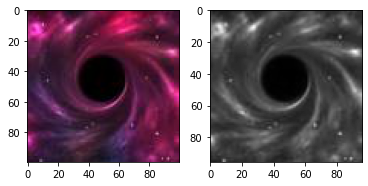

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
preview_index = 0
plt.subplot(1,2,1)
plt.imshow(train_images[preview_index])
plt.subplot(1,2,2)
plt.imshow(preprocess_image(train_images[preview_index]), cmap="gray")

In [6]:
for i in range(len(train_images)):
    train_images[i] = preprocess_image(train_images[i])

In [7]:
import numpy as np

train_images = np.expand_dims(train_images, axis=-1)
train_labels = np.array(train_labels)
print(train_images.shape, train_labels.shape)

(306, 96, 96, 1) (306,)


In [8]:
import tensorflow as tf
print("Tensorflow:", tf.__version__)

layers = [
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=tf.nn.relu, input_shape=train_images.shape[1:]),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=2, activation=tf.nn.softmax)
]

Tensorflow: 2.1.0


In [10]:
model2 = tf.keras.Sequential(layers)
model2.compile(optimizer=tf.optimizers.Adamax(),
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.metrics.SparseCategoricalAccuracy()])
model2.fit(train_images, train_labels, epochs=10, batch_size=50)
model2.save_weights("AdamaxModel.tf")

Train on 306 samples
Epoch 1/10
306/306 [==============================] - 1s 2ms/sample - loss: 0.6865 - sparse_categorical_accuracy: 0.6993
Epoch 2/10
306/306 [==============================] - 0s 371us/sample - loss: 0.5869 - sparse_categorical_accuracy: 0.7059
Epoch 3/10
306/306 [==============================] - 0s 352us/sample - loss: 0.5293 - sparse_categorical_accuracy: 0.7516
Epoch 4/10
306/306 [==============================] - 0s 352us/sample - loss: 0.4782 - sparse_categorical_accuracy: 0.7778
Epoch 5/10
306/306 [==============================] - 0s 354us/sample - loss: 0.4615 - sparse_categorical_accuracy: 0.7778
Epoch 6/10
306/306 [==============================] - 0s 349us/sample - loss: 0.4375 - sparse_categorical_accuracy: 0.7974
Epoch 7/10
306/306 [==============================] - 0s 357us/sample - loss: 0.4290 - sparse_categorical_accuracy: 0.8007
Epoch 8/10
306/306 [==============================] - 0s 357us/sample - loss: 0.4606 - sparse_categorical_accuracy: 0.76